# Hands-on Lab: Complete the Data Collection API Lab
n this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.
#Objectives
In this lab, you will make a get request to the SpaceX API. You will also do some basic data wrangling and formating.

Request to the SpaceX API
Clean the requested data
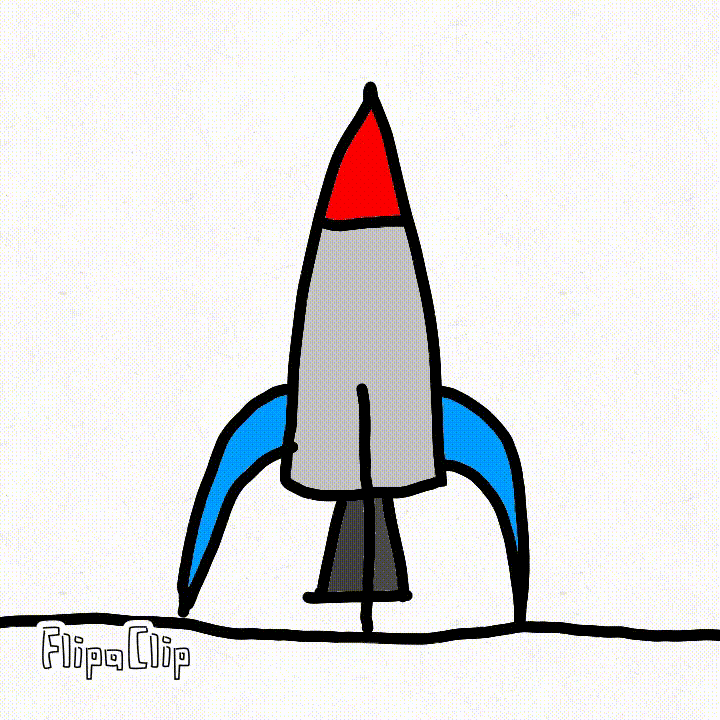


In [ ]:
#Install the below libraries
!pip install requests
!pip install pandas
!pip install numpy

In [ ]:
#Requests allows us to make HTTP requests which we will use to get data from an API
import requests #Used for making HTTP requests to websites and APIs.

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd # Used for data analysis and working with DataFrames.

In [ ]:
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np # Used for numerical computations and working with arrays and matrices.Importing the pandas library for data analysis.

In [ ]:
# Datetime is a library that allows us to represent dates
import datetime # In Python, datetime refers to a built-in module that provides functionality for working with dates and times. It offers various classes and functions to represent, manipulate, and format dates, times, and timedeltas.

In [ ]:
# Setting this option will print all collumns of a dataframe. This option specifies the maximum number of columns to display when printing a DataFrame. By default, pandas only shows the first 20 columns. Setting this option to None disables this restriction and displays all columns.
pd.set_option('display.max_columns', None)

In [ ]:
# Setting this option will print all of the data in a feature. This option determines the maximum width of each column when printing a DataFrame. The default value is usually 50 characters, meaning that wider columns are truncated with an ellipsis (...). Setting this option to None removes this limitation and displays the full content of each column.
pd.set_option('display.max_colwidth', None)

In [ ]:
#"The spacex_url variable name can be freely chosen and replaced with any other appropriate name."
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response = requests.get(spacex_url)

In [ ]:
print(response.headers['Content-Type'])

application/json; charset=utf-8


In [ ]:
print(response.json())

[{'fairings': {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}, 'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}, 'static_fire_date_utc': '2006-03-17T00:00:00.000Z', 'static_fire_date_unix': 1142553600, 'net': False, 'window': 0, 'rocket': '5e9d0d95eda69955f709d1eb', 'success': False, 'failures': [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}], 'details': 'Engine failure at 33 seconds and loss of vehicle', 'crew': [], 'ships': [], 'capsules': [], 'payloads': ['5eb0e4b5b6c3bb0006eeb1e1

In [ ]:
print(response.text)

[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name":

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

"""You should see the response contains massive information about SpaceX launches. Next, let's try to discover some more relevant information for this project.
#Task 1: Request and parse the SpaceX launch data using the GET request
To make the requested JSON results more consistent, we will use the following static response object for this project:

In [ ]:
#"static" means that the content of the URL stored in the static_json_url variable does not change. In other words, this URL always points to a specific JSON file with content that remains constant and doesn't update over time.
static_json_url = 'https:\\cf-courses-data.s3.us.cloud-object-storage.apddomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [ ]:
#In the context of data collection, a status code of 200 typically indicates a successful operation, meaning the data collection process has completed without any errors.
response.status_code

200

In [ ]:
#Python comes with a built-in library called json that facilitates working with JSON data. This library provides functions for decoding JSON from strings and Python objects, as well as encoding Python objects into JSON strings.
#JSON is often utilized for exchanging data with APIs.
data = response.json()

In [ ]:
#Once normalized, data becomes easier to access and manipulate using Pandas' data manipulation functions. You can easily select, filter, sort, and aggregate data based on specific criteria, facilitating further analysis and insights.
data = pd.json_normalize(data)

In [ ]:
#data = pd.json_normalize(response.json())

"""Get the head of the dataframe"""

In [ ]:
data.head()

static_fire_date_utc  static_fire_date_unix    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                      None                    NaN  False     0.0   
2                      None                    NaN  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                      None                    NaN  False     0.0   

                     rocket success  \
0  5e9d0d95eda69955f709d1eb   False   
1  5e9d0d95eda69955f709d1eb   False   
2  5e9d0d95eda69955f709d1eb   False   
3  5e9d0d95eda69955f709d1eb    True   
4  5e9d0d95eda69955f709d1eb    True   

                                                                                                            failures  \
0                                                [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]   
1            [{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]   
2  [{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]   
3                                                                                                                 []   
4                                                                                                                 []   

                                                                                                                                                                                details  \
0                                                                                                                                      Engine failure at 33 seconds and loss of vehicle   
1  Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage   
2                                                                                                                  Residual stage 1 thrust led to collision between stage 1 and stage 2   
3                        Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1   
4                                                                                                                                                                                  None   

  crew ships capsules                                              payloads  \
0   []    []       []                            [5eb0e4b5b6c3bb0006eeb1e1]   
1   []    []       []                            [5eb0e4b6b6c3bb0006eeb1e2]   
2   []    []       []  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   
3   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e5]   
4   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad  flight_number         name  \
0  5e9e4502f5090995de566f86              1    FalconSat   
1  5e9e4502f5090995de566f86              2      DemoSat   
2  5e9e4502f5090995de566f86              3  Trailblazer   
3  5e9e4502f5090995de566f86              4       RatSat   
4  5e9e4502f5090995de566f86              5     RazakSat   

                   date_utc   date_unix                 date_local  \
0  2006-03-24T22:30:00.000Z  1143239400  2006-03-25T10:30:00+12:00   
1  2007-03-21T01:10:00.000Z  1174439400  2007-03-21T13:10:00+12:00   
2  2008-08-03T03:34:00.000Z  1217734440  2008-08-03T15:34:00+12:00   
3  2008-09-28T23:15:00.000Z  1222643700  2008-09-28T11:15:00+12:00   
4  2009-07-13T03:35:00.000Z  1247456100  2009-07-13T15:35:00+12:00   

  date_precision  upcoming  \
0           hour     False   
1           hour     False   
2           hour     False   
3           hour     False   
4           hour     False   

                                                                                 

In [ ]:
#After gathering information from our data and understanding the columns and their contents, we may encounter columns named "links" that seem irrelevant to our analysis. As a data scientist, it's crucial to go beyond existing knowledge and acquire project-specific insights. This involves thorough research, consultations with clients or stakeholders, and a deep understanding of the problem at hand. This additional knowledge plays a significant role in shaping the problem-solving approach and formulating effective solutions.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        187 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     187 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   187 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       187 non-null    object 
 9   ships                      187 non-null    object 
 10  capsules                   187 non-null    object 
 11  payloads                   187 non-null    object 
 12  launchpad                  187 non-null    object 
 13  flight_number              187 non-null    int64  

In [ ]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')

In [ ]:
data["cores"]

0                           [{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
1                           [{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
2                           [{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
3                           [{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
4                           [{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
                                                                                                               ...                                                                                                          
182     [{'core': '5e9e28a6f359183c413b265d', 'flight': 7, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}]
183    [{'core': '5e9e28a7f3591817f23b2663', 'flight': 14, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecb075134e7cd'}]
184     [{'core': '60b800111f83cc1e59f16438', 'flight': 6, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}]
185     [{'core': '627843d657b51b752c5c5a53', 'flight': 4, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}]
186    [{'core': '633d9da635a71d1d9c66797b', 'flight': 1, 'gridfins': True, 'legs': True, 'reused': False, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}]
Name: cores, Length: 187, dtype: object

"""We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns rocket, payloads, launchpad, and cores."""


In [ ]:
##Identify and segregate the crucial data
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

In [ ]:
data.head(2)

rocket                    payloads  \
0  5e9d0d95eda69955f709d1eb  [5eb0e4b5b6c3bb0006eeb1e1]   
1  5e9d0d95eda69955f709d1eb  [5eb0e4b6b6c3bb0006eeb1e2]   

                  launchpad  \
0  5e9e4502f5090995de566f86   
1  5e9e4502f5090995de566f86   

                                                                                                                                                                                              cores  \
0  [{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]   
1  [{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]   

   flight_number                  date_utc  
0              1  2006-03-24T22:30:00.000Z  
1              2  2007-03-21T01:10:00.000Z

In [ ]:
#"The SpaceX project requires us to focus on testing single-core rockets. We won't be examining rockets that employ two-core boosters."
# ==1: This comparison operator checks whether the length of each element in the cores column is equal to 1.
# ==1: This comparison operator checks whether the length of each element in the payloads column is equal to 1.
#It calculates the length of each individual element in the payloads column. This length represents the number of items within each element, which are assumed to be lists or arrays in this context.
#To extract rows where the length is equal to one and add them to the original DataFrame, you can use the following code:
#We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

In [ ]:
#To apply a lambda function that extracts the first element (index 0) using the map method on each column in Python, you can follow these steps:
# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x:x[0])

In [ ]:
data['payloads'] = data['payloads'].map(lambda x:x[0])

In [ ]:
##Extracting Date Without Time from a Column
# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

In [ ]:
#We only want to test launches that were before this date.
#We don't want this column to be based on hour or minute; we want it to be based on date.
# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
#From the rocket we would like to learn the booster name.
#From the payload we would like to learn the mass of the payload and the orbit that it is going to
#From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.
#From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.
# "We are preparing a list of things we want."
#The data from these requests will be stored in lists and will be used to create a new dataframe.

In [ ]:
BoosterVersion = [] #list khali misazim har chizi ke az dele prozhe mikhaym ke yekseri kar ke anjam midim ro datamon berizim to in list hae khali
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
#These functions will apply the outputs globally to the above variables. Let's take a looks at BoosterVersion variable. Before we apply getBoosterVersion the list is empty:
BoosterVersion

[]

In [ ]:
#Explanation:1.Fetches data ( an IP address or URL as input) 2.Processes rocket column 3.Converts to string 4.Converts to JSON
#To extract rocket names from JSON responses, we can define a function that iterates through the rocket column and retrieves the relevant information from the corresponding JSON URLs

In [ ]:
rockets= requests.get("https://api.spacexdata.com/v4/rockets/").json()

In [ ]:
def getBoosterVersion(data):  #mikham esme on racket ro biron bekeshim
    for x in data['rocket']:
      if x:
        response= requests.get("https://api.spacexdata.com/v4/rockets/"+ str(x)).json()
        BoosterVersion.append(response['name']) #ghesmate string va name ro birun bekesh boro to link va booterversion va yek name hast onja , ono bekesh birun va ezafe kon be booster version ke aval sakhteh bodim


In [ ]:
        # Now, let's apply getBoosterVersion function method to get the booster version
        # Call getBoosterVersion
        # getBoosterVersion is the name of our function.
        # the list has now been update
        getBoosterVersion(data)

In [ ]:
#As you can see, it is the name of our rockets, but we are currently working with the Falcon 9.#BoosterVersion[0:5]
print(BoosterVersion)

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Fa

In [ ]:
# Call getPayloadData
#From the payload we would like to learn the mass of the payload and the orbit that it is going to.
#Takes the dataset and uses the payloads column to call the API and append the data to the lists
#It extracts the mass_kg (mass in kilograms) value.
#It extracts the orbit value (the orbit around which the payload is traveling).
#It appends the mass_kg to a pre-existing list named payloads_mass.
#It appends the orbit to a pre-existing list named orbits.

In [ ]:
def getPayloadData(data):  #baz dobare ye tabe minevisim
    for load in data['payloads']:
        response= requests.get("https://api.spacexdata.com/v4/payloads/"+ load).json() #en dafe string nemikham balke load mikham
        PayloadMass.append(response['mass_kg']) #mass ro append kon to payloadmass
        Orbit.append(response['orbit']) #orbit ro ham append kon to orbit


In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
print(getPayloadData)

<function getPayloadData at 0x7a6fba21a5c0>


In [ ]:
PayloadMass[0:4]  #inaj mitonam bejae print az en dastor estefadeh konam #masalan avali 20 kilo hast

[20, None, 165, 200]

In [ ]:
Orbit[0:10] #mikham 4 tae aval ro bebinam

['LEO', 'LEO', 'LEO', 'LEO', 'LEO', 'LEO', 'ISS', 'PO', 'GTO', 'GTO']

In [ ]:
#From the launchpad we would like to know the name of the launch site being used, the logitude, and the latitude.
# Takes the dataset and uses the launchpad column to call the API and append the data to the list

In [ ]:
def getLaunchSite(data):
    for x in data['launchpad']: #launchsite ro khodemon sakhtim launch pad bod.
        response= requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        LaunchSite.append(response['name'])
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        # Call getLaunchSite
getLaunchSite(data)


In [ ]:
LaunchSite[0:4]

['Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll']

In [ ]:
Longitude[0:4]

[167.7431292, 167.7431292, 167.7431292, 167.7431292]

In [ ]:
Latitude[0:4]

[9.0477206, 9.0477206, 9.0477206, 9.0477206]

In [ ]:
print(getLaunchSite)

<function getLaunchSite at 0x7a6fba05c0e0>


In [ ]:
print(LaunchSite)

['Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'KSC LC 39A', 'KSC LC 39A', 'KSC LC 39A', 'KSC LC 39A', 'KSC LC 39A', 'KSC LC 39A', 'VAFB SLC 4E', 'KSC LC 39A', 'KSC LC 39A', 'VAFB SLC 4E', 'KSC LC 39A', 'VAFB SLC 4E', 'KSC LC 39A', 'KSC LC 39A', 'CCSFS SLC 40', 'VAFB SLC 4E', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'CCSFS SLC 40', 'CCSFS SLC 40', 'KSC LC 39A', 'CCSFS SLC 40', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'CCSFS SLC 40', 'CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'VAFB SLC 4E', 'CCSFS SLC 40', 'C

In [ ]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None: #برای بررسی وجود اطلاعات هسته
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)  #اگر اطلاعاتی در مورد هسته وجود نداشته باشد، مقدار None به لیست‌ها اضافه می‌شود.
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
getCoreData(data)

In [ ]:
Outcome[0:6]

['None None', 'None None', 'None None', 'None None', 'None None', 'None None']

In [ ]:
#Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary
launch_dict = {'FlightNumber': list(data['flight_number']), #ye dic misazim masalan flight number ro list kon bedeh be ma
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [ ]:
data2= pd.DataFrame(launch_dict)

In [ ]:
len(GridFins)

94

In [ ]:
#Now, let's convert our constructed dictionary into a DataFrame.

In [ ]:
#dic ke darim ro tabdil mikonim be yek data fram az tarigh pandas

In [ ]:
def pad_dict_list(dict_list):
    # پیدا کردن تمام کلیدهای موجود در لیست دیکشنری‌ها
    all_keys = {key for d in dict_list for key in d.keys()}

    # شناسایی نوع داده برای هر کلید
    key_types = {key: None for key in all_keys}
    for key in all_keys:
        # جمع‌آوری مقادیر غیر None برای تشخیص نوع داده
        values = [d[key] for d in dict_list if key in d and d[key] is not None]
        if values:
            # تعیین نوع داده براساس اولین مقدار غیر None
            if isinstance(values[0], (int, float)):
                key_types[key] = 'numeric'
            elif isinstance(values[0], str):
                key_types[key] = 'string'
            else:
                key_types[key] = 'other'

    # پر کردن کلیدهای گمشده در هر دیکشنری
    filled_dict_list = []
    for d in dict_list:
        filled_dict = {}
        for key in all_keys:
            if key in d and d[key] is not None:
                filled_dict[key] = d[key]
            else:
                # مقدار جایگزین بر اساس نوع داده
                if key_types[key] == 'numeric':
                    # مقدار عددی پیش‌فرض: 0 یا میانه (اختیاری)
                    numeric_values = [d[key] for d in dict_list if key in d and isinstance(d[key], (int, float))]
                    filled_dict[key] = sum(numeric_values) / len(numeric_values) if numeric_values else 0
                elif key_types[key] == 'string':
                    # مقدار رشته‌ای پیش‌فرض: "unknown" یا مد
                    string_values = [d[key] for d in dict_list if key in d and isinstance(d[key], str)]
                    filled_dict[key] = max(set(string_values), key=string_values.count) if string_values else "unknown"
                else:
                    # مقدار پیش‌فرض برای سایر موارد
                    filled_dict[key] = "unknown"
        filled_dict_list.append(filled_dict)

    return filled_dict_list


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         94 non-null     int64  
 8   GridFins        94 non-null     bool   
 9   Reused          94 non-null     bool   
 10  Legs            94 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [ ]:
data2.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

Task 2: Filter the dataframe to only include `Falcon 9` launches

# Task 2: Filter the dataframe to only include `Falcon 9` launches





In [ ]:
#Then, we need to create a Pandas data frame from the dictionary launch_dict.
# Hint data['BoosterVersion']!='Falcon 1'
data_falcon9 = data2[data2['BoosterVersion']!= 'Falcon1']

In [ ]:
#These are the columns we've created so far, but we haven't added any content to them yet.
data_falcon9 #sotonhaee  ke felan darim ro neshon mideh ma dakhelesh ro por nakardim

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1         20.0   LEO   
1              2  2007-03-21       Falcon 1          NaN   LEO   
2              4  2008-09-28       Falcon 1        165.0   LEO   
3              5  2009-07-13       Falcon 1        200.0   LEO   
4              6  2010-06-04       Falcon 9          NaN   LEO   
..           ...         ...            ...          ...   ...   
89           102  2020-09-03       Falcon 9      15600.0  VLEO   
90           103  2020-10-06       Falcon 9      15600.0  VLEO   
91           104  2020-10-18       Falcon 9      15600.0  VLEO   
92           105  2020-10-24       Falcon 9      15600.0  VLEO   
93           106  2020-11-05       Falcon 9       3681.0   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  False   
2   Kwajalein Atoll  None None        1     False   False  False   
3   Kwajalein Atoll  None None        1     False   False  False   
4      CCSFS SLC 40  None None        1     False   False  False   
..              ...        ...      ...       ...     ...    ...   
89       KSC LC 39A  True ASDS        2      True    True   True   
90       KSC LC 39A  True ASDS        3      True    True   True   
91       KSC LC 39A  True ASDS        6      True    True   True   
92     CCSFS SLC 40  True ASDS        3      True    True   True   
93     CCSFS SLC 40  True ASDS        1      True   False   True   

                  LandingPad  Block  ReusedCount    Serial   Longitude  \
0                       None    NaN            0  Merlin1A  167.743129   
1                       None    NaN            0  Merlin2A  167.743129   
2                       None    NaN            0  Merlin2C  167.743129   
3                       None    NaN            0  Merlin3C  167.743129   
4                       None    1.0            0     B0003  -80.577366   
..                       ...    ...          ...       ...         ...   
89  5e9e3032383ecb6bb234e7ca    5.0           12     B1060  -80.603956   
90  5e9e3032383ecb6bb234e7ca    5.0           13     B1058  -80.603956   
91  5e9e3032383ecb6bb234e7ca    5.0           12     B1051  -80.603956   
92  5e9e3033383ecbb9e534e7cc    5.0           12     B1060  -80.577366   
93  5e9e3032383ecb6bb234e7ca    5.0            8     B1062  -80.577366   

     Latitude  
0    9.047721  
1    9.047721  
2    9.047721  
3    9.047721  
4   28.561857  
..        ...  
89  28.608058  
90  28.608058  
91  28.608058  
92  28.561857  
93  28.561857  

[94 rows x 17 columns]

In [ ]:
print(data_falcon9)

    FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1         20.0   LEO   
1              2  2007-03-21       Falcon 1          NaN   LEO   
2              4  2008-09-28       Falcon 1        165.0   LEO   
3              5  2009-07-13       Falcon 1        200.0   LEO   
4              6  2010-06-04       Falcon 9          NaN   LEO   
..           ...         ...            ...          ...   ...   
89           102  2020-09-03       Falcon 9      15600.0  VLEO   
90           103  2020-10-06       Falcon 9      15600.0  VLEO   
91           104  2020-10-18       Falcon 9      15600.0  VLEO   
92           105  2020-10-24       Falcon 9      15600.0  VLEO   
93           106  2020-11-05       Falcon 9       3681.0   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  False   
2  

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1         20.0   LEO   
1              2  2007-03-21       Falcon 1          NaN   LEO   
2              3  2008-09-28       Falcon 1        165.0   LEO   
3              4  2009-07-13       Falcon 1        200.0   LEO   
4              5  2010-06-04       Falcon 9          NaN   LEO   
..           ...         ...            ...          ...   ...   
89            90  2020-09-03       Falcon 9      15600.0  VLEO   
90            91  2020-10-06       Falcon 9      15600.0  VLEO   
91            92  2020-10-18       Falcon 9      15600.0  VLEO   
92            93  2020-10-24       Falcon 9      15600.0  VLEO   
93            94  2020-11-05       Falcon 9       3681.0   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  False   
2   Kwajalein Atoll  None None        1     False   False  False   
3   Kwajalein Atoll  None None        1     False   False  False   
4      CCSFS SLC 40  None None        1     False   False  False   
..              ...        ...      ...       ...     ...    ...   
89       KSC LC 39A  True ASDS        2      True    True   True   
90       KSC LC 39A  True ASDS        3      True    True   True   
91       KSC LC 39A  True ASDS        6      True    True   True   
92     CCSFS SLC 40  True ASDS        3      True    True   True   
93     CCSFS SLC 40  True ASDS        1      True   False   True   

                  LandingPad  Block  ReusedCount    Serial   Longitude  \
0                       None    NaN            0  Merlin1A  167.743129   
1                       None    NaN            0  Merlin2A  167.743129   
2                       None    NaN            0  Merlin2C  167.743129   
3                       None    NaN            0  Merlin3C  167.743129   
4                       None    1.0            0     B0003  -80.577366   
..                       ...    ...          ...       ...         ...   
89  5e9e3032383ecb6bb234e7ca    5.0           12     B1060  -80.603956   
90  5e9e3032383ecb6bb234e7ca    5.0           13     B1058  -80.603956   
91  5e9e3032383ecb6bb234e7ca    5.0           12     B1051  -80.603956   
92  5e9e3033383ecbb9e534e7cc    5.0           12     B1060  -80.577366   
93  5e9e3032383ecb6bb234e7ca    5.0            8     B1062  -80.577366   

     Latitude  
0    9.047721  
1    9.047721  
2    9.047721  
3    9.047721  
4   28.561857  
..        ...  
89  28.608058  
90  28.608058  
91  28.608058  
92  28.561857  
93  28.561857  

[94 rows x 17 columns]

In [ ]:
data_falcon9[0:5]

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             3  2008-09-28       Falcon 1        165.0   LEO   
3             4  2009-07-13       Falcon 1        200.0   LEO   
4             5  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

In [ ]:
len(data_falcon9)

94

In [ ]:
data_falcon9.to_csv('data_falcon9_week01.csv' , index=False)

# Data Wrangling

In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        6
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        30
Block              4
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

# Task 3: Dealing with Missing Values

In [ ]:
# Calculate the mean value of PayloadMass column
PayloadMass_mean = data_falcon9['PayloadMass'].mean()
PayloadMass_mean

5919.16534090909

In [ ]:
data_falcon9['PayloadMass'] = data_falcon9['PayloadMass'].fillna(PayloadMass_mean)

In [ ]:
print(data_falcon9)

    FlightNumber        Date BoosterVersion   PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1     20.000000   LEO   
1              2  2007-03-21       Falcon 1   5919.165341   LEO   
2              3  2008-09-28       Falcon 1    165.000000   LEO   
3              4  2009-07-13       Falcon 1    200.000000   LEO   
4              5  2010-06-04       Falcon 9   5919.165341   LEO   
..           ...         ...            ...           ...   ...   
89            90  2020-09-03       Falcon 9  15600.000000  VLEO   
90            91  2020-10-06       Falcon 9  15600.000000  VLEO   
91            92  2020-10-18       Falcon 9  15600.000000  VLEO   
92            93  2020-10-24       Falcon 9  15600.000000  VLEO   
93            94  2020-11-05       Falcon 9   3681.000000   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  

In [ ]:
print(data2['BoosterVersion'].unique())

['Falcon 1' 'Falcon 9']


In [ ]:
# Replace the np.nan values with its mean value
#data_falcon9['PayloadMass'] = data2['PayloadMass'].replace(np.nan, PayloadMass_mean)

In [ ]:
data_falcon9['PayloadMass']

0        20.000000
1      5919.165341
2       165.000000
3       200.000000
4      5919.165341
          ...     
89    15600.000000
90    15600.000000
91    15600.000000
92    15600.000000
93     3681.000000
Name: PayloadMass, Length: 94, dtype: float64

In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        30
Block              4
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         94 non-null     int64  
 8   GridFins        94 non-null     bool   
 9   Reused          94 non-null     bool   
 10  Legs            94 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [ ]:
data_falcon9.to_csv('data_falcon9_week01.csv' , index=False)

In [ ]:
data_falcon9.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1    20.000000   LEO   
1             2  2007-03-21       Falcon 1  5919.165341   LEO   
2             3  2008-09-28       Falcon 1   165.000000   LEO   
3             4  2009-07-13       Falcon 1   200.000000   LEO   
4             5  2010-06-04       Falcon 9  5919.165341   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857